In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data from the excel file
data = pd.read_excel(r'C:\Users\sreeh\DSA\Data-sets\iris1.xls')

In [3]:
data.head() #checking the dataset

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Let's see the basic details of the dataset.

In [4]:
data.shape

(150, 5)

In [5]:
# Checking for null values.
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Visualizing the basic details of the dataset with a pairplot.

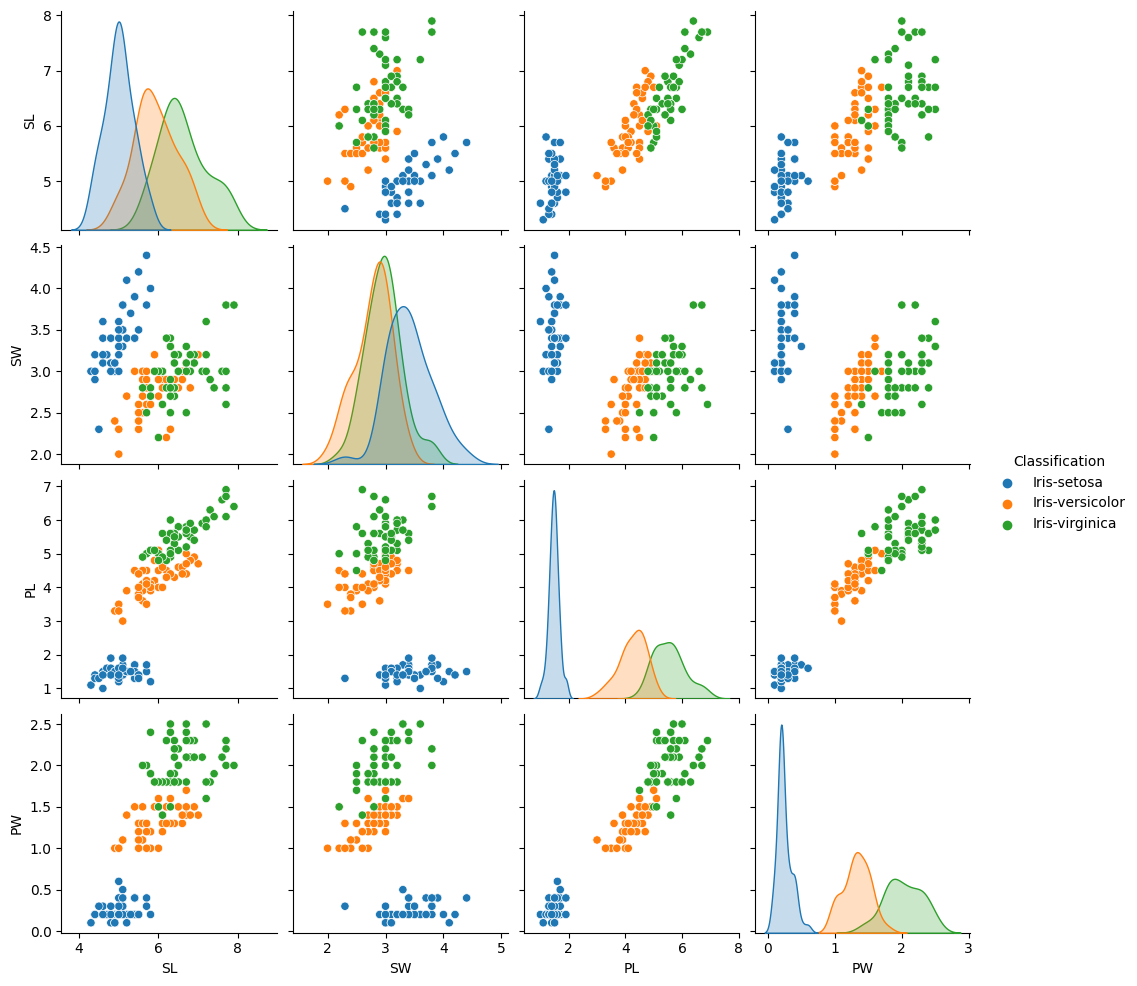

In [6]:
sns.pairplot(data, hue= "Classification")

As the data is more or less distributed normall, using mean to fill the missing values.

In [7]:
for i in ['SL','SW','PL']:
    data[i]=data[i].groupby(data['Classification']).fillna(data[i].mean())

In [8]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<AxesSubplot: >

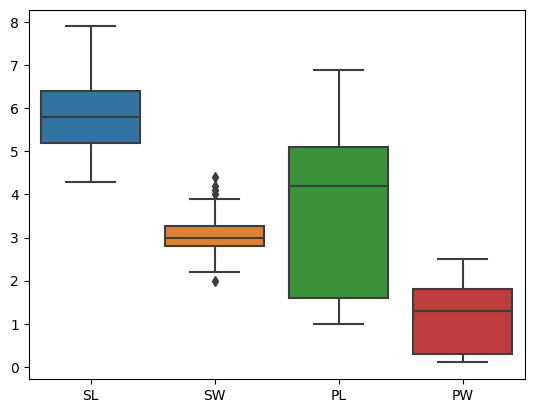

In [9]:
# Checking for outliers
sns.boxplot(data)

<AxesSubplot: xlabel='Classification', ylabel='SW'>

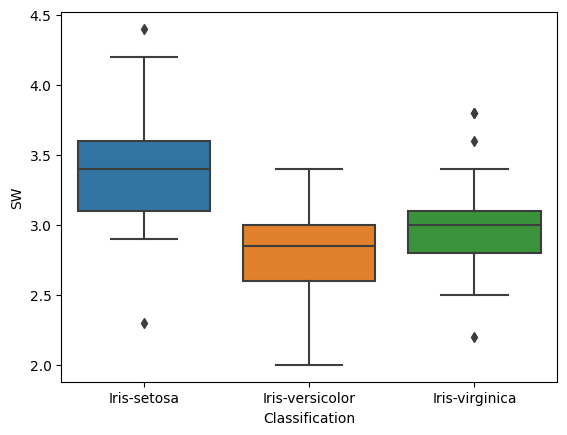

In [10]:
# Checking SW further based on Classification
sns.boxplot(data=data, y= "SW", x= "Classification")

In [11]:
# Removing outliers based on IQR
for spec in data["Classification"].unique():
    spec_type = data[data["Classification"] == spec]
    selected_column = spec_type['SW']
    q1 = selected_column.quantile(0.25)
    q3 = selected_column.quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr        
    outliers = selected_column[(selected_column > upper_limit) | (selected_column < lower_limit)].index
    data.drop(index = outliers, inplace=True)

Label encoding the Classification column:  
0 - Setosa
1 - Versicolor
2 - Virginica

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])

In [13]:
# Seperating the Target and the Dependent Columns
x= data.drop(['Classification'],axis=1)
y= data['Classification']

In [14]:
# Splitting the data into training and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state= 42)

### Logistic Regression

In [15]:
# Training the data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model = lr.fit(x_train,y_train)

In [16]:
# Predicting the data
y_predictions = model.predict(x_test)

In [17]:
# Checking how well the model performed
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("The confusion Matrix")
print(confusion_matrix(y_test,y_predictions))

The confusion Matrix
[[14  1  0]
 [ 1 15  0]
 [ 0  1 12]]


In [18]:
print("Accuracy = ",accuracy_score(y_test,y_predictions))
print("Precision = ",precision_score(y_test,y_predictions,average='weighted'))
print("Recall = ",recall_score(y_test,y_predictions,average='weighted'))
print("F1 Score", f1_score(y_test,y_predictions,average='weighted'))

Accuracy =  0.9318181818181818
Precision =  0.9344919786096256
Recall =  0.9318181818181818
F1 Score 0.9323966942148761


### K-Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# Checking for the best value of k.
metric_k = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric ='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

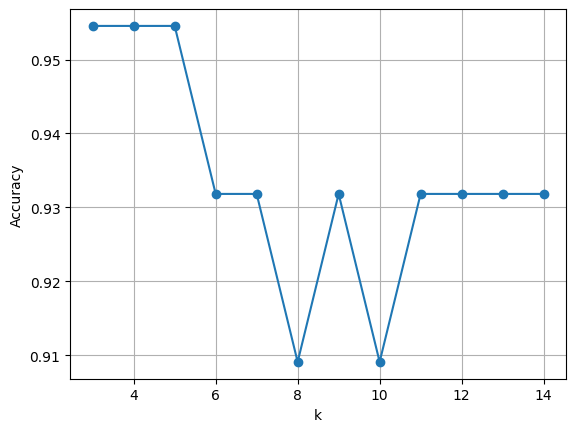

In [21]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [22]:
# From the graph we will use 4 as k.
classifier = KNeighborsClassifier(n_neighbors = 4,metric ='euclidean')
classifier.fit(x_train,y_train)
y_predictions = classifier.predict(x_test)

In [23]:
# Checking how well the model performed
print("The confusion Matrix")
print(confusion_matrix(y_test,y_predictions))

The confusion Matrix
[[14  1  0]
 [ 0 16  0]
 [ 0  1 12]]


In [24]:
print("Accuracy = ",accuracy_score(y_test,y_predictions))
print("Precision = ",precision_score(y_test,y_predictions,average='weighted'))
print("Recall = ",recall_score(y_test,y_predictions,average='weighted'))
print("F1 Score", f1_score(y_test,y_predictions,average='weighted'))

Accuracy =  0.9545454545454546
Precision =  0.9595959595959596
Recall =  0.9545454545454546
F1 Score 0.9550359579568505


With a higher F1 score the K-Nearest Neighbors method performs slightly better than Logistic Regression. This could be because the Logitstic Regression is primarily used for binary classification.

## Some Extra Alogrithms

### Support Vector Machine

In [25]:
# SVM Model
from sklearn.svm import SVC
svmclf = SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [26]:
y_predictions = svmclf.predict(x_test)

In [27]:
# Checking how well the model performed
print("The confusion Matrix")
print(confusion_matrix(y_test,y_predictions))

The confusion Matrix
[[15  0  0]
 [ 0 16  0]
 [ 0  1 12]]


In [28]:
print("Accuracy = ",accuracy_score(y_test,y_predictions))
print("Precision = ",precision_score(y_test,y_predictions,average='weighted'))
print("Recall = ",recall_score(y_test,y_predictions,average='weighted'))
print("F1 Score", f1_score(y_test,y_predictions,average='weighted'))

Accuracy =  0.9772727272727273
Precision =  0.9786096256684492
Recall =  0.9772727272727273
F1 Score 0.9771625344352618


### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
y_predictions = dt_clf.predict(x_test)

In [31]:
# Checking how well the model performed
print("The confusion Matrix")
print(confusion_matrix(y_test,y_predictions))

The confusion Matrix
[[15  0  0]
 [ 0 16  0]
 [ 0  2 11]]


In [32]:
print("Accuracy = ",accuracy_score(y_test,y_predictions))
print("Precision = ",precision_score(y_test,y_predictions,average='weighted'))
print("Recall = ",recall_score(y_test,y_predictions,average='weighted'))
print("F1 Score", f1_score(y_test,y_predictions,average='weighted'))

Accuracy =  0.9545454545454546
Precision =  0.9595959595959596
Recall =  0.9545454545454546
F1 Score 0.9539884135472371


### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
y_predictions = rf_clf.predict(x_test)

In [35]:
# Checking how well the model performed
print("The confusion Matrix")
print(confusion_matrix(y_test,y_predictions))

The confusion Matrix
[[15  0  0]
 [ 0 16  0]
 [ 0  1 12]]


In [36]:
print("Accuracy = ",accuracy_score(y_test,y_predictions))
print("Precision = ",precision_score(y_test,y_predictions,average='weighted'))
print("Recall = ",recall_score(y_test,y_predictions,average='weighted'))
print("F1 Score", f1_score(y_test,y_predictions,average='weighted'))

Accuracy =  0.9772727272727273
Precision =  0.9786096256684492
Recall =  0.9772727272727273
F1 Score 0.9771625344352618


All three algorithms performed better than Logistic Regression.